## ROC 曲线

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target==9] = 1
y[digits.target!=9] = 0
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

/A/develop/ide/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [3]:
import sys
sys.path.append('..')

In [4]:
from ClassicIMPL.metric import FPR,TPR

In [22]:
fprs = []
tprs =[]
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores),0.1)
for threshold in thresholds:
    y_p = np.array(decision_scores>=threshold,dtype='int')
    fprs.append(FPR(y_test,y_p,))
    tprs.append(TPR(y_test,y_p))

In [23]:
thresholds.shape

(1056,)

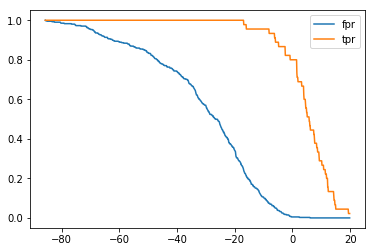

In [25]:
plt.plot(thresholds,fprs,label='fpr')
plt.plot(thresholds,tprs,label='tpr')
plt.legend()
plt.show()

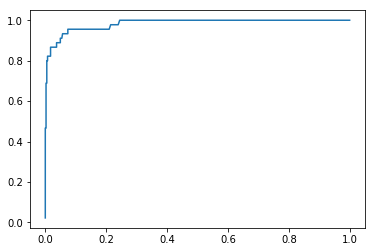

In [26]:
plt.plot(fprs, tprs)
plt.show()

## scikit-learn中的ROC

In [27]:
from sklearn.metrics import roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

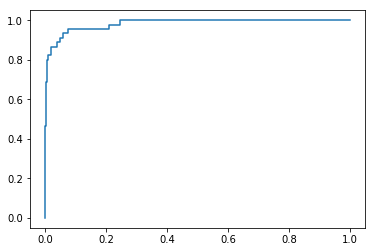

In [28]:
plt.plot(fprs, tprs)
plt.show()

# ROC AUC

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.9830452674897119